#**Assignment 1:** Introduction to Neural Networks

####**Course:** SCC0270-SCC5809 Artificial Neural Networks
####**Professor:** Moacir Antonelli Ponti
####**Assistant:** Sherlon Almeida da Silva

####Obs.: This assignment was adapted from the 3D Graphics Systems course ([here](https://lvelho.impa.br/i3d23/)), proposed by Luiz Velho and Hallison Paz.

---
#**Personal Info:**
*   **Student:**
    *   Giovana Meloni Craveiro
    *   9791264

#**Neural Networks for Function Approximation**

In this assignment you will practice working with the Google Colab environment and PyTorch. You’ll also practice building a Perceptron to fit a function. The goals of this practice are the following:

-   Gain experience setting and using notebooks on Google Colab.
-   Develop familiarity with basic structures of PyTorch: tensors, autograd, modules.
-   Understand neural networks as functions and models for functions approximation.
-   Develop familiarity with the data-driven approach.
-   Train a neural network to fit 1D functions.
-   Use visualization tools to evaluate your result.

# 1. What is an Artificial Neural Network?

## 1.1 Perceptron: the artificial neuron

* Perceptron, [implementação de Thomas Countz](https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron)

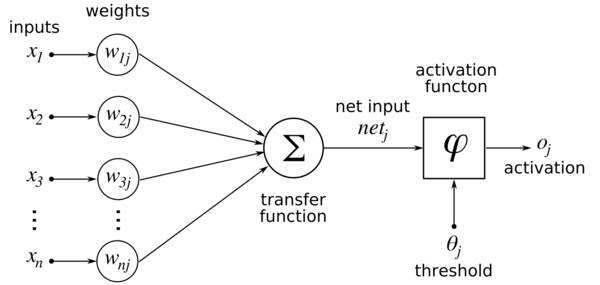

##**Task 1:** (2 pts) Can you implement a Perceptron without using a deep learning specific framework?

i.e. using regular numerical processing libraries such as numpy

In [10]:
import numpy as np
# your perceptron implementation here

class Perceptron():
    # constructor initializes parameters
    def __init__(self, num_inputs, lr=0.01):
       # w - samples of a normal distribution with mean=0 and standard deviation (std) = 1 
       self.weights = np.random.normal(0,1, size=(num_inputs,1))
       # b - with constant value either 1 or 0 or even 1/total number of classes
       # initializing b with 0
       self.b = np.zeros(1)
        # saves number of classes (at entry layer)
       self.num_inputs = num_inputs
       # saves learning rate (lr)
       self.lr = lr

    def forward(self, X):
        #  X*w (matrix multiplication) + b 
        return X@self.weights + self.b

    # mean of the quadratic loss, also a differentiation function but I'm not using it now
    #def loss(self,y,y_hat):
        # calculates quadratic loss
    #    l = (y_hat - y.reshape(y_hat.shape))**2 / 2
        # returns the mean of the quadratic loss
    #    return l.mean()
    
    def backward(self,X,y):
        y_hat = self.forward(X) # forward pass
        errors = (y.reshape(y_hat.shape) - y_hat) # differentiation function (cost) 
        return errors

    def train_step(self,X,y):
        for i in range(y.shape[0]):
            error = self.backward(X[i].reshape(1,self.num_inputs), y[i]).reshape(-1) # reshape -1 para achatar o tensor
            # gradient descent
            self.weights = self.weights + self.lr*(error*X[i]).reshape(self.num_inputs,1)
            self.b = self.b + self.lr*error

    def train(self,X,y):
        epochs = 10
        for e in range(epochs):
            my_perceptron.train_step(X,y)

    def predict(self,X):
        return self.forward(X)


# linear model Xw + b
my_perceptron = Perceptron(2)

# SOME DEBUG TESTS

# Printing some values
#print(my_perceptron.weights, my_perceptron.b)
#print(my_perceptron.forward(np.array([1,1], dtype=np.float32)))

# regression problems
#X = np.arange(16, dtype=np.float32).reshape((8,2)) + np.random.normal(0,0.5,(8,2))
#y = np.arange(8,dtype=np.float32)
#print(X,y)
#my_perceptron.forward(X), y

#y_hat = my_perceptron.forward(X)
#my_perceptron.loss(y, y_hat)
#print(my_perceptron.train_step(X,y))

### Validate your Perceptron implementation with Logic Gates **AND** and **OR**.


### AND Logic gate
Validate an AND logic gate to verify its separability using your perceptron implementation.

In [11]:
#Input Data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,0,0,1])

#Train
nD_inputs = len(X[0]) #The dimensionality
and_ = Perceptron(nD_inputs)
and_.train(X, y)
print("Weights:", and_.weights)

Weights: [[ 0.12874003]
 [-0.11866137]]


In [16]:
import torch

#Generating sample points between [0, 1] to Test and Plot
n_samples = 10
dimensionality = 2
test = np.array(torch.rand([n_samples, dimensionality]))

#Test
predictions = []
for curr_test in test:
  predictions.append(and_.predict(curr_test))
  print("Test:", curr_test, "---> Predicted:", predictions[-1])

print(predictions)

Test: [0.7398837 0.9961761] ---> Predicted: [-0.02295497]
Test: [0.39572126 0.7895083 ] ---> Predicted: [-0.04273897]
Test: [0.1714338  0.43244076] ---> Predicted: [-0.02924362]
Test: [0.6947181  0.45651567] ---> Predicted: [0.03526726]
Test: [0.8741767 0.2918598] ---> Predicted: [0.07790905]
Test: [0.7503039  0.50538844] ---> Predicted: [0.03662407]
Test: [0.6752496  0.72037107] ---> Predicted: [0.00145143]
Test: [0.0817219  0.40797484] ---> Predicted: [-0.03788997]
Test: [0.49983996 0.66855675] ---> Predicted: [-0.01498245]
Test: [0.5139686 0.5516173] ---> Predicted: [0.00071266]
[array([-0.02295497]), array([-0.04273897]), array([-0.02924362]), array([0.03526726]), array([0.07790905]), array([0.03662407]), array([0.00145143]), array([-0.03788997]), array([-0.01498245]), array([0.00071266])]


#### Visualize the learned function, as well as the points

### **Task 2:** (1 pt) Modify the following code to color the 1s and 0s as predicted by the network.


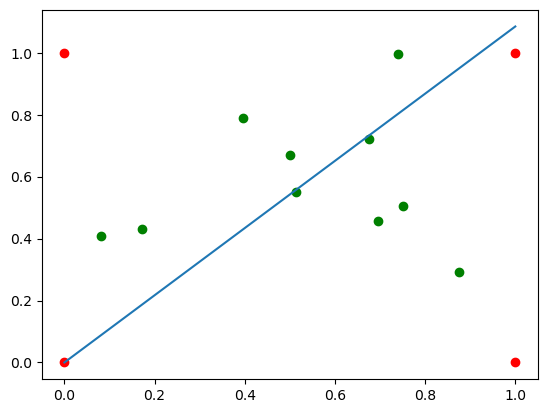

In [18]:
import matplotlib.pyplot as plt
avoid_zero_division = 0.000001
b = and_.weights[0] + avoid_zero_division
a = and_.weights[1] + avoid_zero_division
#x = and_.weights[2] + avoid_zero_division

slope = -and_.weights[0] / and_.weights[1]#-(b/x)/(b/a) #Coeficiente angular
intercept = -and_.b / and_.weights[1]#-b/x     #Coeficiente linear

#Plot train data
for curr_data in X:
  x = curr_data[0]
  y = curr_data[1]
  plt.plot(x, y,'ro')

#Plot test data
# write your code here
for index,curr_test in enumerate(test):
  x = curr_test[0]
  y = curr_test[1]
  
  if predictions[index] == 1:
      plt.plot(x, y, 'bo')  # Plot 1s in blue
  else:
      plt.plot(x, y, 'go')  # Plot 0s in green

#Plot line learned during training
#y = mx + c, m is slope and c is intercept
x1 = 0
y1 = (slope*x1) + intercept

x2 = 1
y2 = (slope*x2) + intercept

plt.plot([x1,x2], [y1,y2])
plt.show()

### OR Logic gate
Validate an OR logic gate to verify its separability using your perceptron implementation.

### **Task 3**: (1 pts) **Describe what you observed during the experiments:**

(your observations)

It seems that a Perceptron is very bad at reaching the correct values for an AND operation, none of the result values were either 0 or 1, which are the only two possible correct values. I don't understand why would anyone want to have a Perceptron performing an AND Logic gate.

## 1.2 Multilayer Perceptron

Multilayer Perceptron is a fully connected class of neural networks which presents multiple perceptrons connected in a computational graph that "flows" from inputs to outputs.

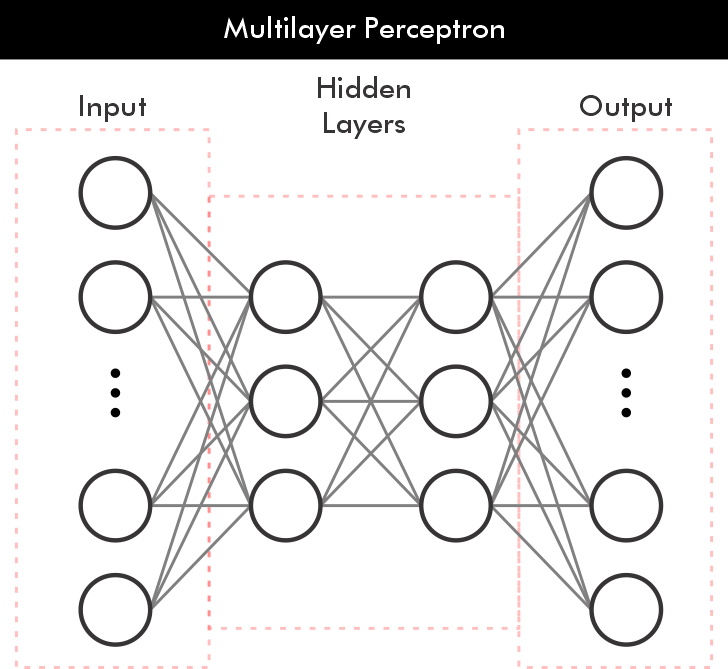

# 2. How can we build a MLP network in PyTorch?

In [47]:
import torch
import numpy as np
from torch import nn

In [48]:
class LineNetwork(nn.Module):
  # Initialization
  def __init__(self):
    super().__init__()
    # a single perceptron
    self.layers = nn.Sequential(
        nn.Linear(1, 1)
    )

  # how the network operates
  def forward(self, x):
    return self.layers(x)

# 3. How can we train a neural network?

Let's train our network to regress a simple affine function. A single Perceptron should be able to approximate a line, right?

## 3.1 Preparing the data infrastructure

In [49]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [50]:
# This is a Dataset class to work with PyTorch
class AlgebraicDataset(Dataset):
  '''Abstraction for a dataset of a 1D function'''

  def __init__(self, f, interval, nsamples):
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples, 1]) # changed from [nsamples] to [nsamples, 1]
    self.data = [(x, f(x)) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [51]:
# we need a function
line = lambda x: 2*x + 3
# a domain for our function
interval = (-10, 10)
# the number of points we are going to sample for training
train_nsamples = 1000
# the number of points we are going to evaluate our model on
test_nsamples = 100

In [52]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset  = AlgebraicDataset(line, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)

# 3.2 Hyperparameters for Optimization

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"running on {device}")

running on cpu


In [54]:
model = LineNetwork().to(device) #Aloca memória na GPU e copia os dados para lá.

In [55]:
# Loss Function: Mean Squared Error
lossfunc = nn.MSELoss()

# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

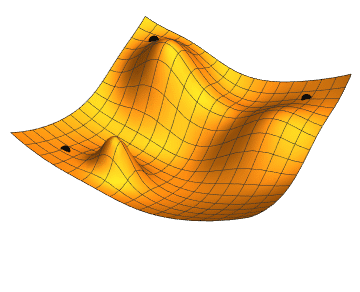

## **Task 4**: (5 pts) implement the functions that allow training and testing the model

In [63]:

def train(model, dataloader, lossfunc, optimizer):   
    total_loss = 0.0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # Zero the gradients       
        outputs = model(inputs) # Forward pass
        loss = lossfunc(outputs, targets) # Calculate the loss
        loss.backward() # Backpropagation
        optimizer.step() # Update the weights
        total_loss += loss.item()

    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(dataloader)
    return average_loss

def test(model, dataloader, lossfunc):
    total_loss = 0.0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # Zero the gradients       
        outputs = model(inputs) # Forward pass
        loss = lossfunc(outputs, targets) # Calculate the loss
        total_loss += loss.item()

    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(dataloader)
    return average_loss


# 3.3 Training the network



In [64]:
# for visualization
import imageio
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

In [65]:
# Function to visualize results (to be used later in the notebook)
def plot_comparison(f, model, interval=(-10, 10), nsamples=10, return_array=True, epoc="None", loss="None"):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  #print(samples, pred.cpu())
  plt.title(f"Epochs: {epoc}, Loss: {loss:.4f}")
  plt.legend()
  plt.show()
  # to return image as numpy array
  if return_array:
    fig.canvas.draw()
    img_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    return img_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

Epoch: 0; Train Loss: 0.2248746007680893


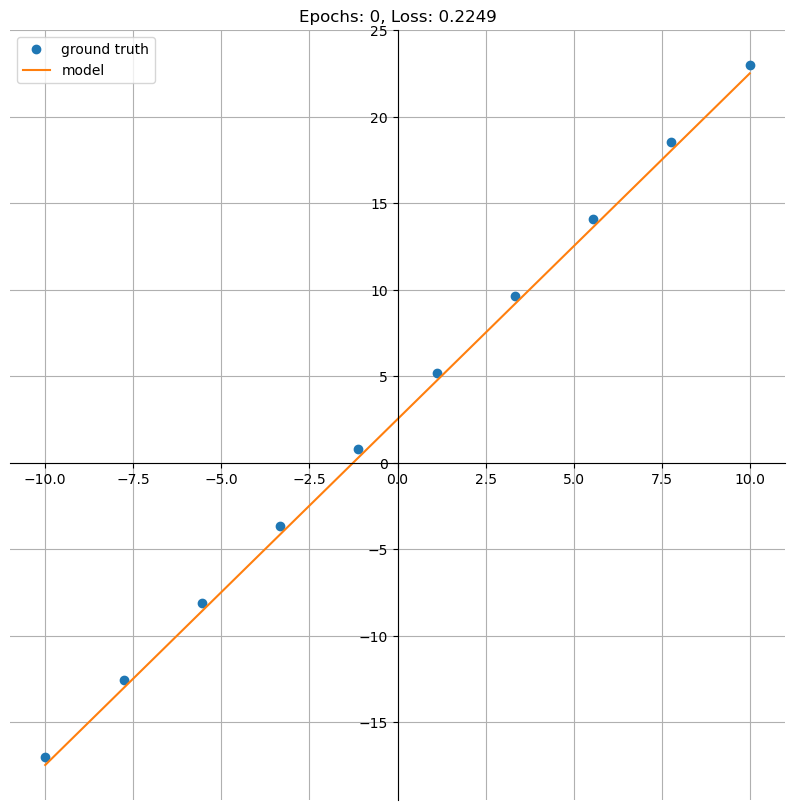

Epoch: 25; Train Loss: 0.2034580260515213


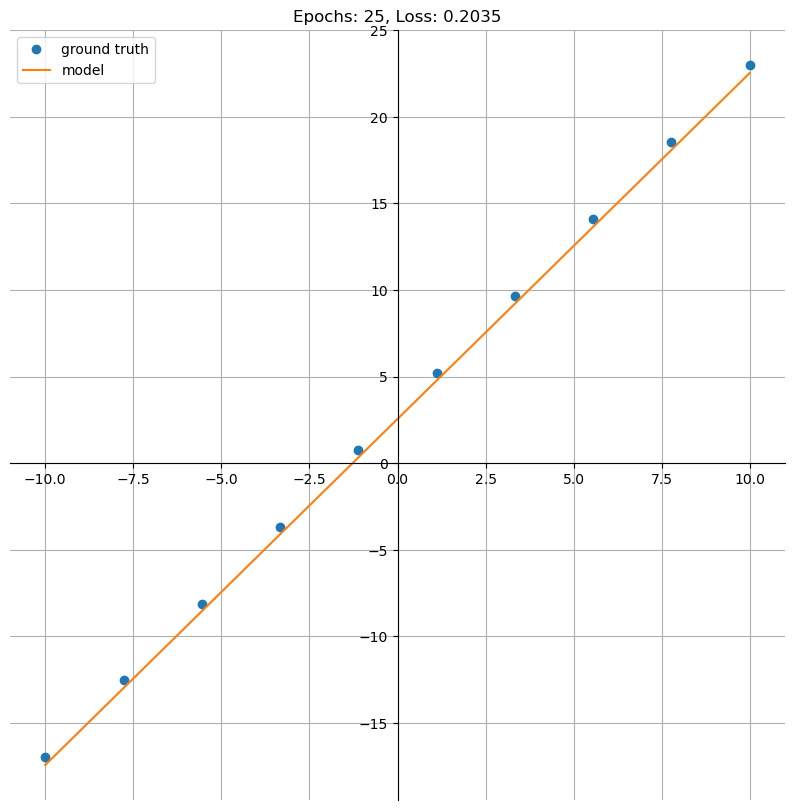

Epoch: 50; Train Loss: 0.18408143520355225


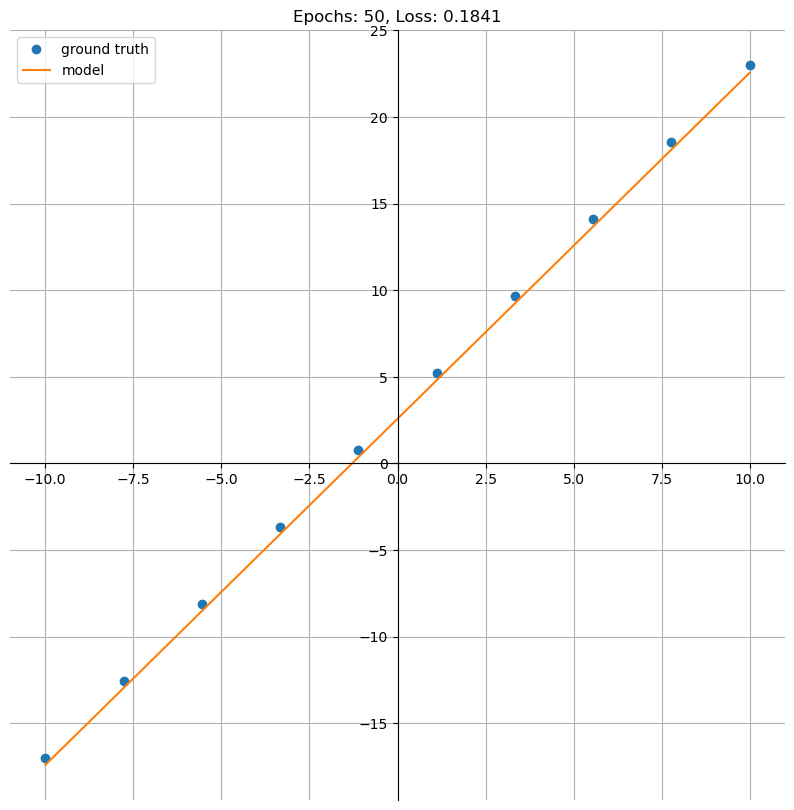

Epoch: 75; Train Loss: 0.166550412774086


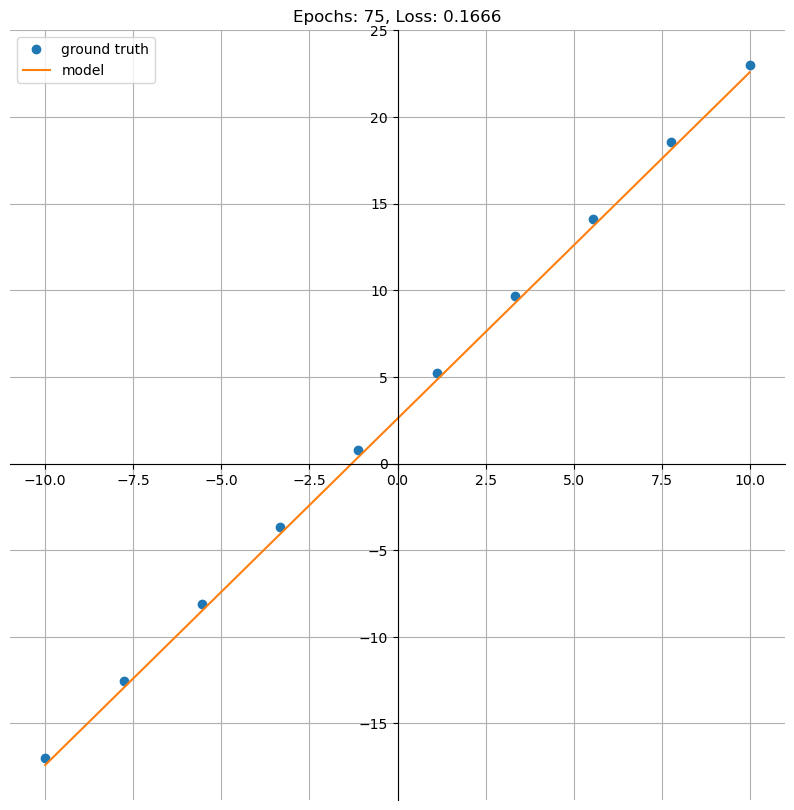

Epoch: 100; Train Loss: 0.15068861842155457


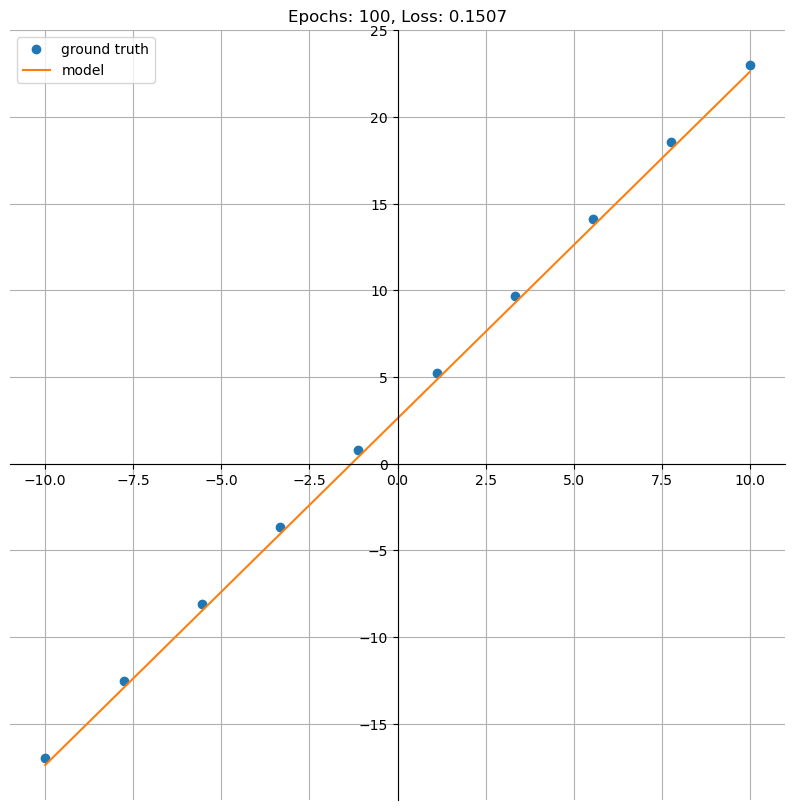

Epoch: 125; Train Loss: 0.1363372653722763


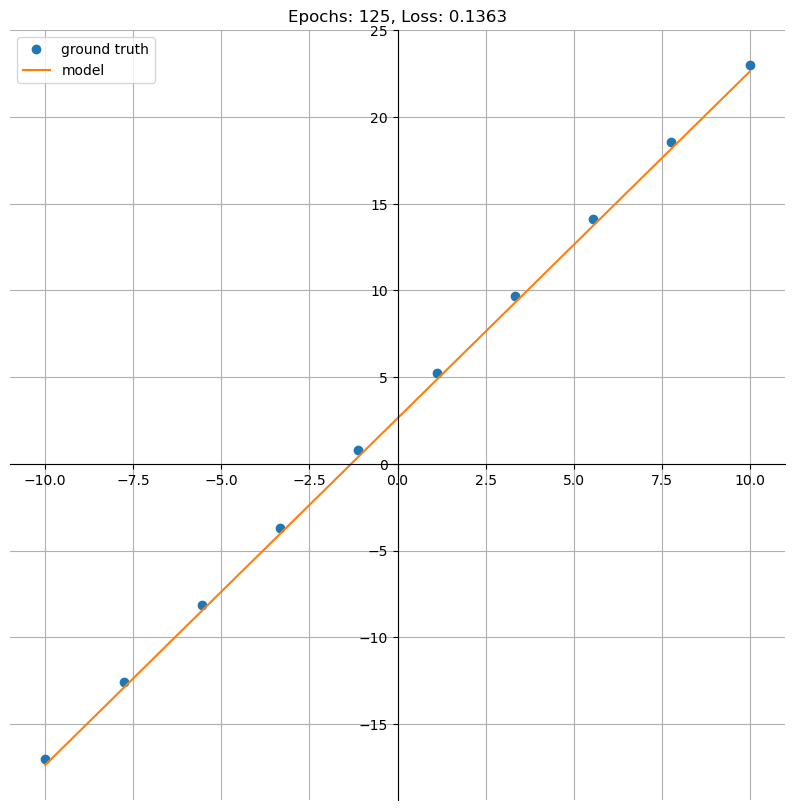

Epoch: 150; Train Loss: 0.12335246801376343


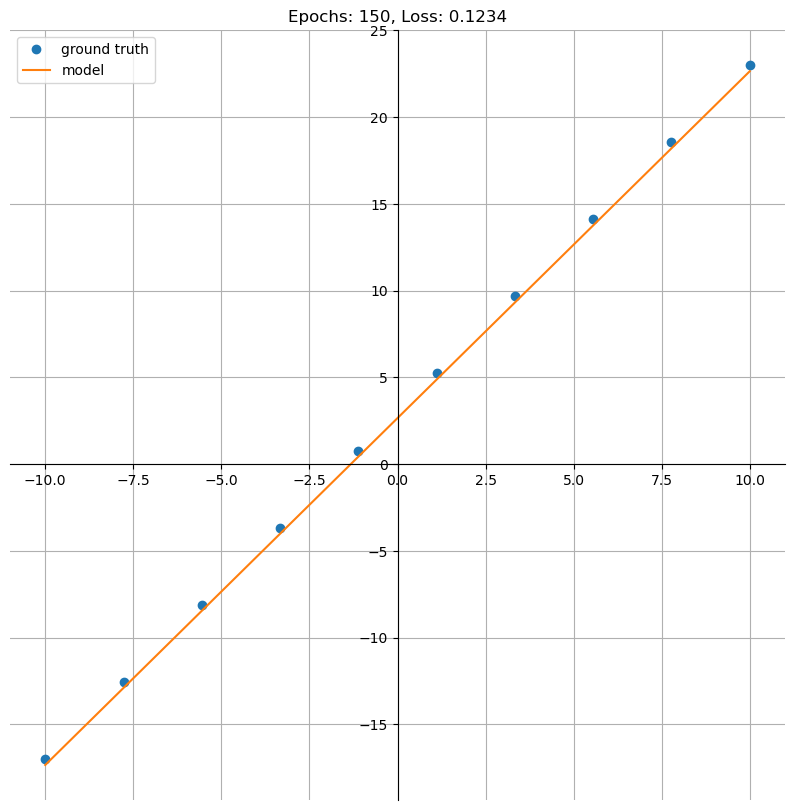

Epoch: 175; Train Loss: 0.11160477250814438


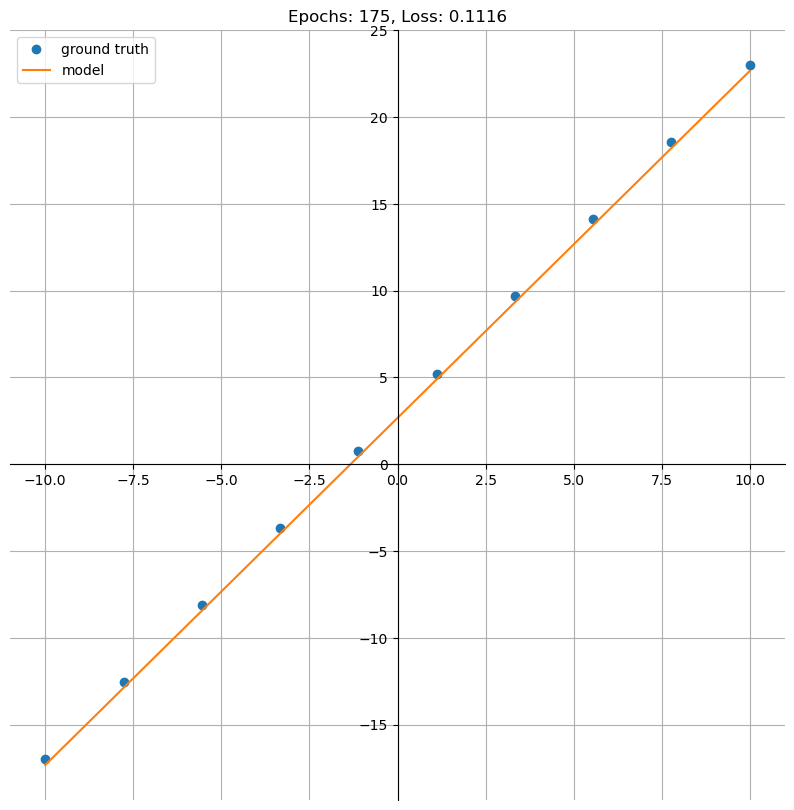

Epoch: 200; Train Loss: 0.10097570717334747


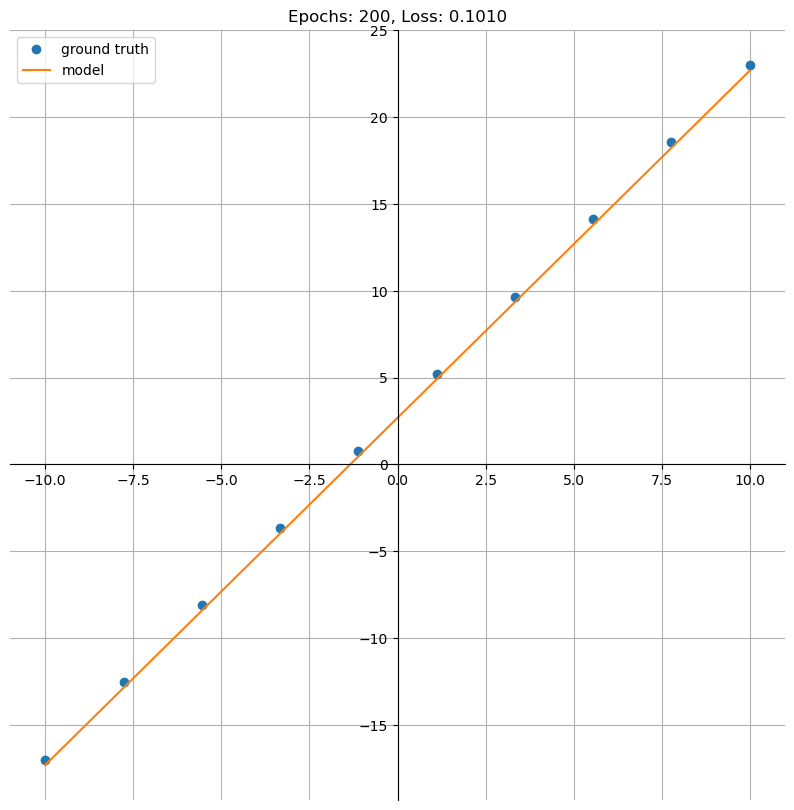

Epoch: 225; Train Loss: 0.09135912358760834


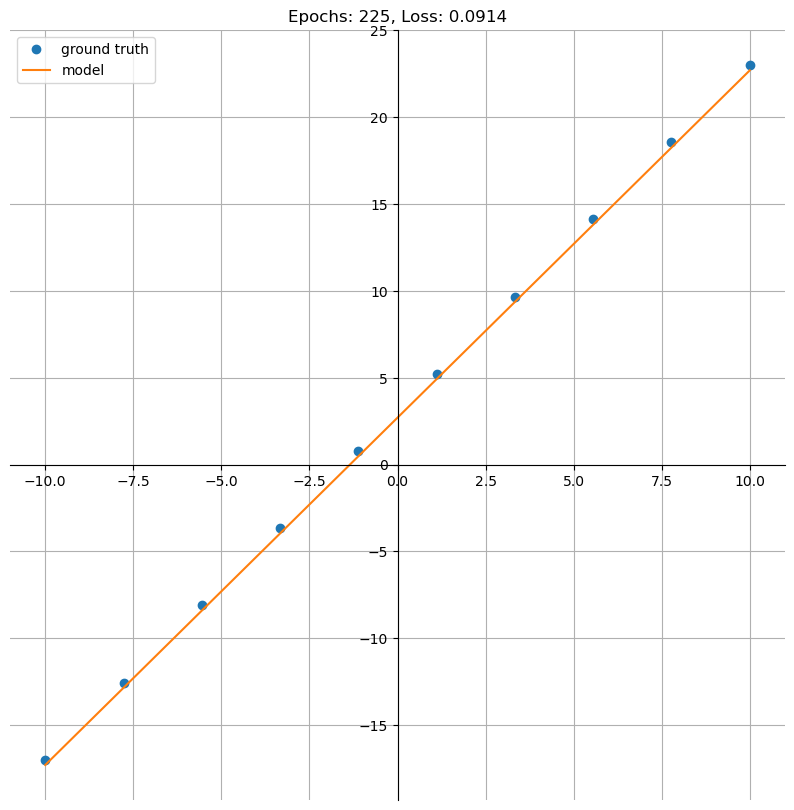

Epoch: 250; Train Loss: 0.08265866339206696


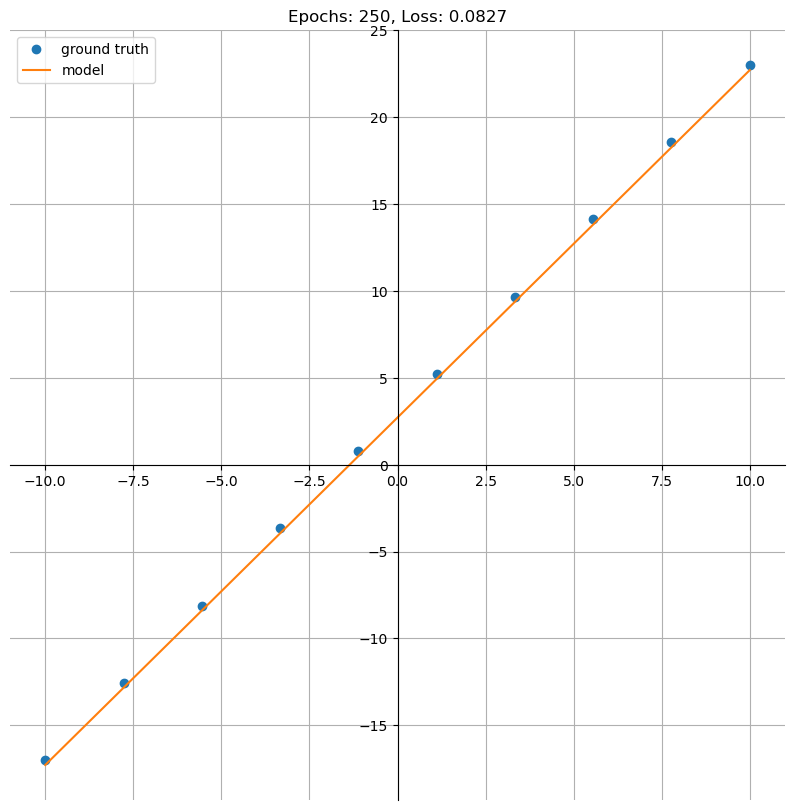

Epoch: 275; Train Loss: 0.07478630542755127


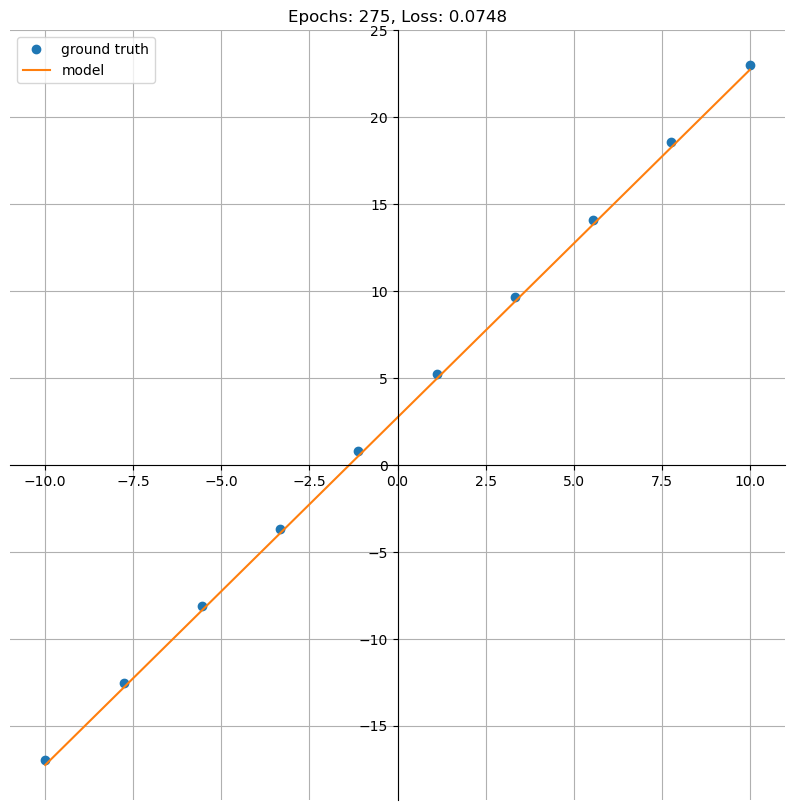

Epoch: 300; Train Loss: 0.06766403466463089


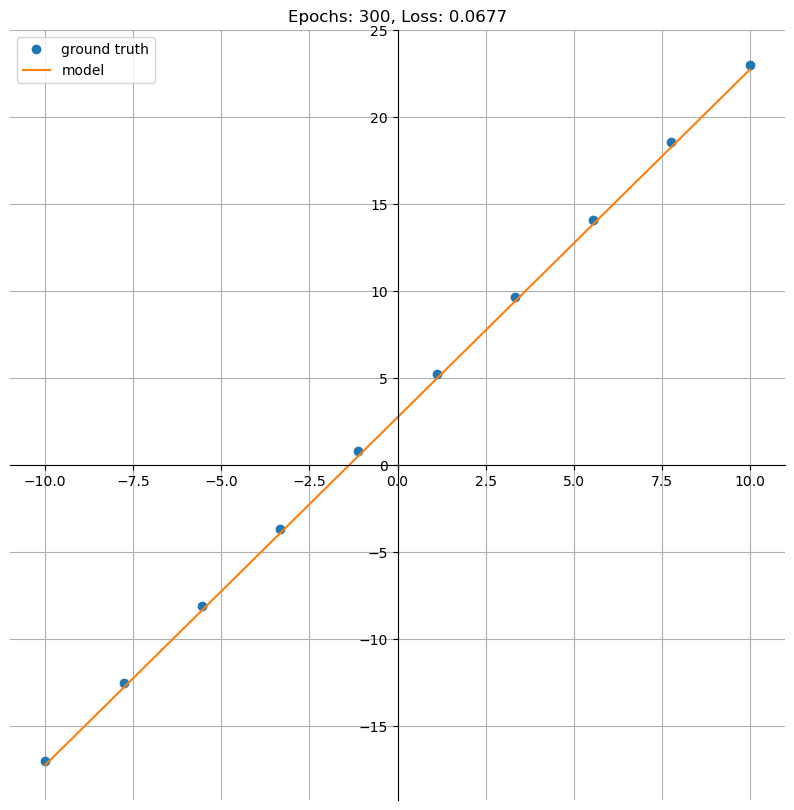

Epoch: 325; Train Loss: 0.061219703406095505


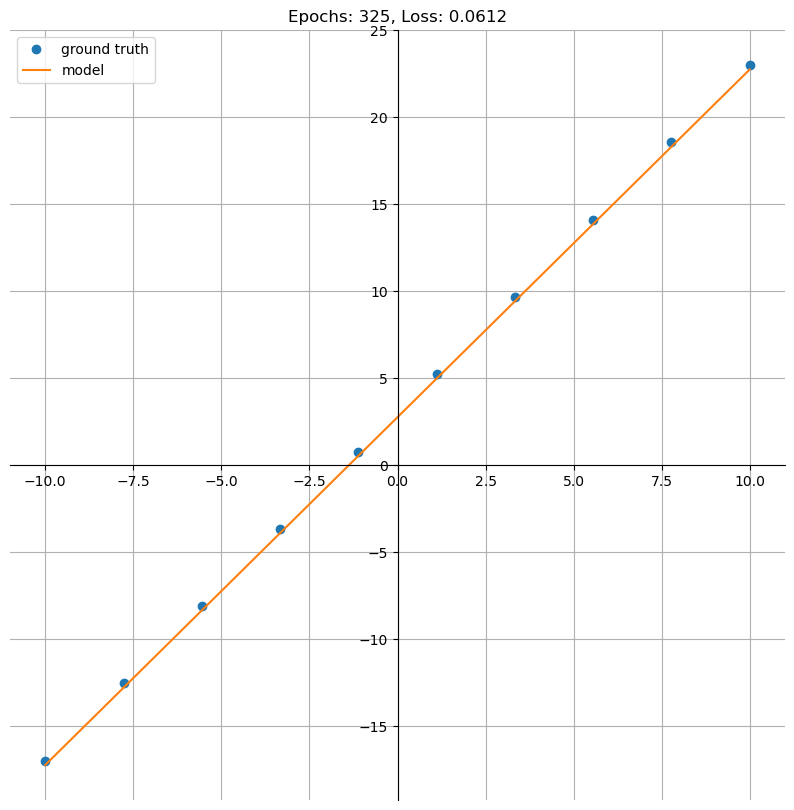

Epoch: 350; Train Loss: 0.055389512330293655


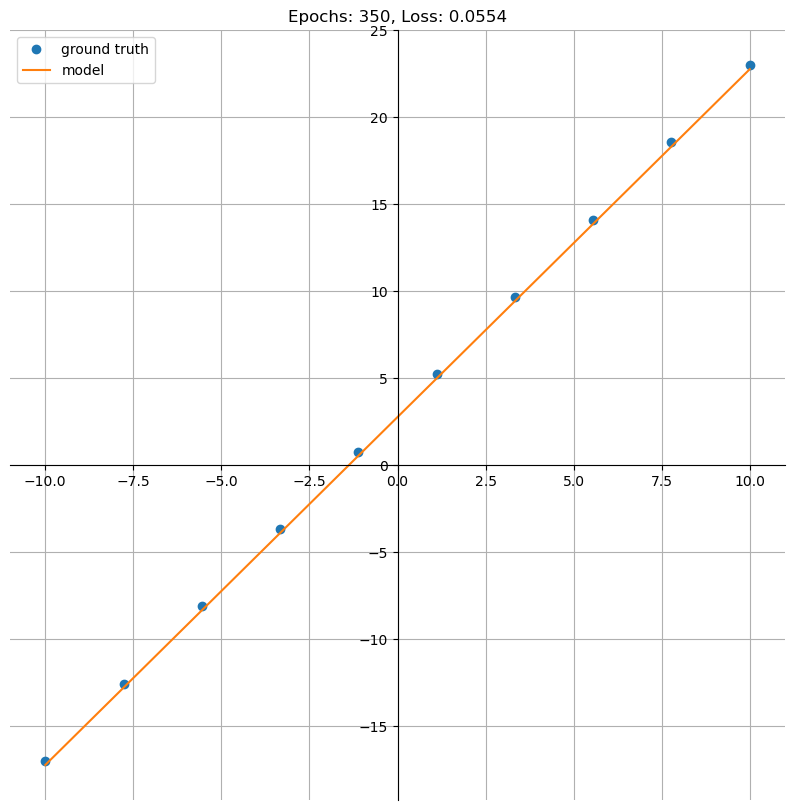

Epoch: 375; Train Loss: 0.050114504992961884


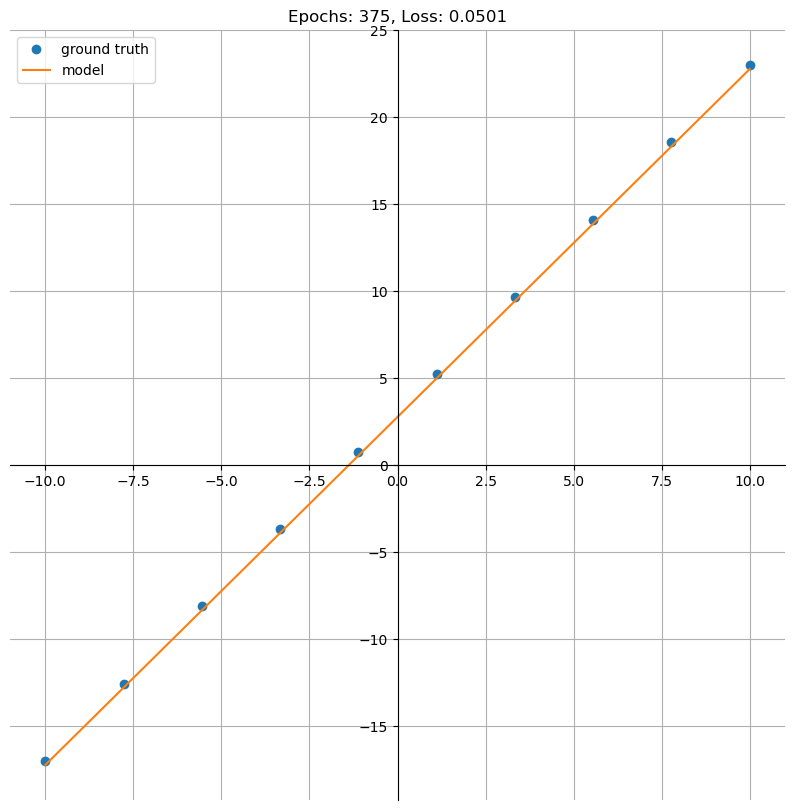

Epoch: 400; Train Loss: 0.04534168913960457


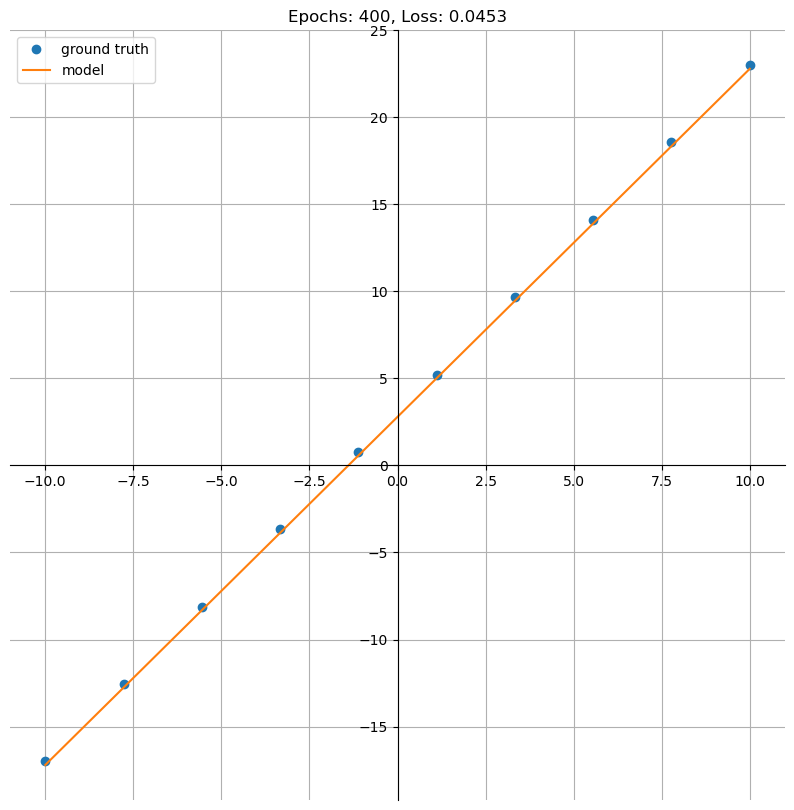

Epoch: 425; Train Loss: 0.041023507714271545


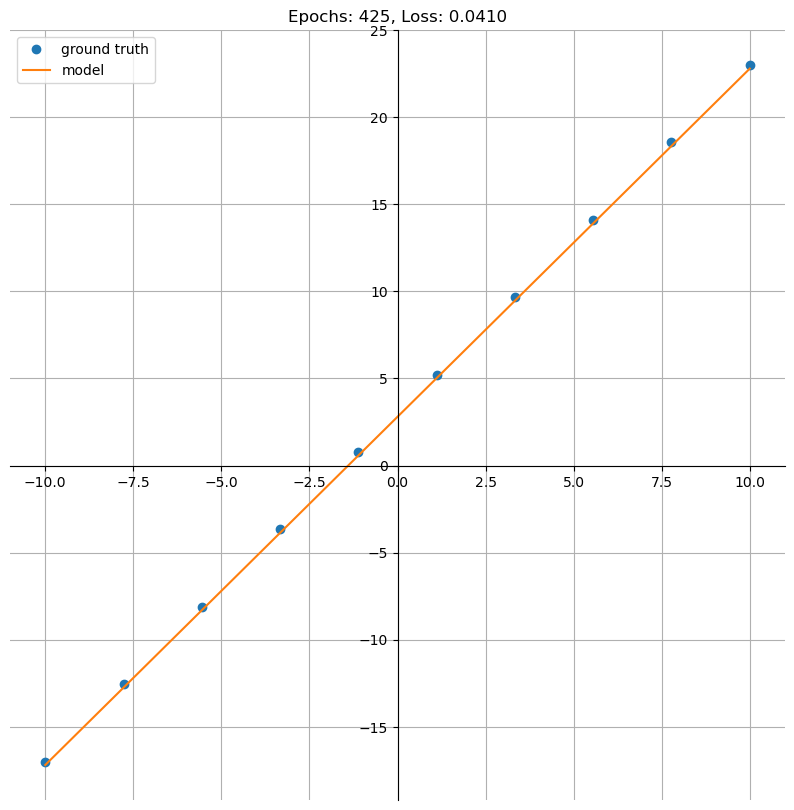

Epoch: 450; Train Loss: 0.03711665794253349


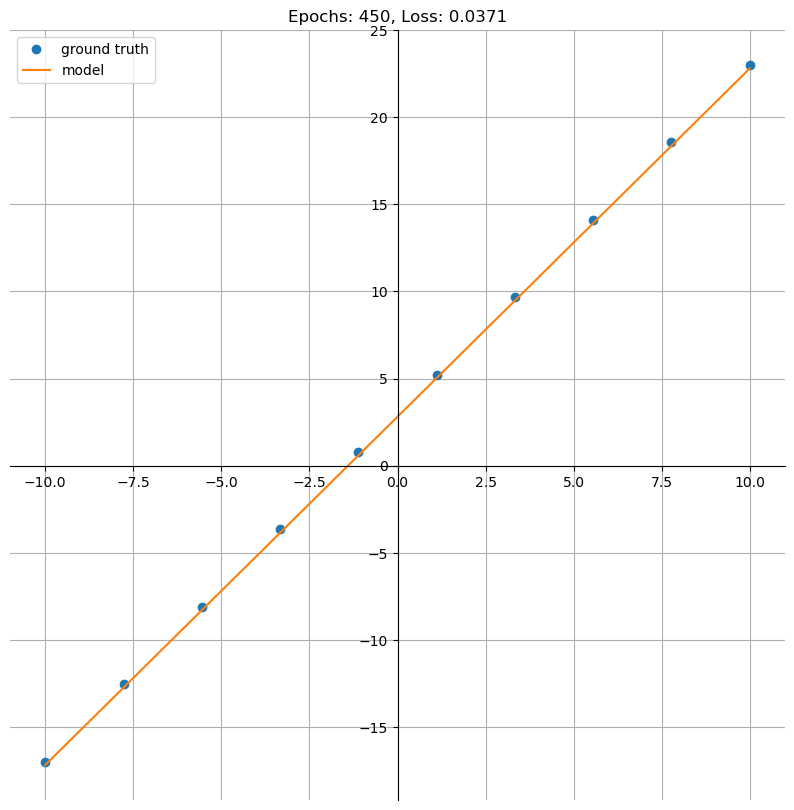

Epoch: 475; Train Loss: 0.033581800758838654


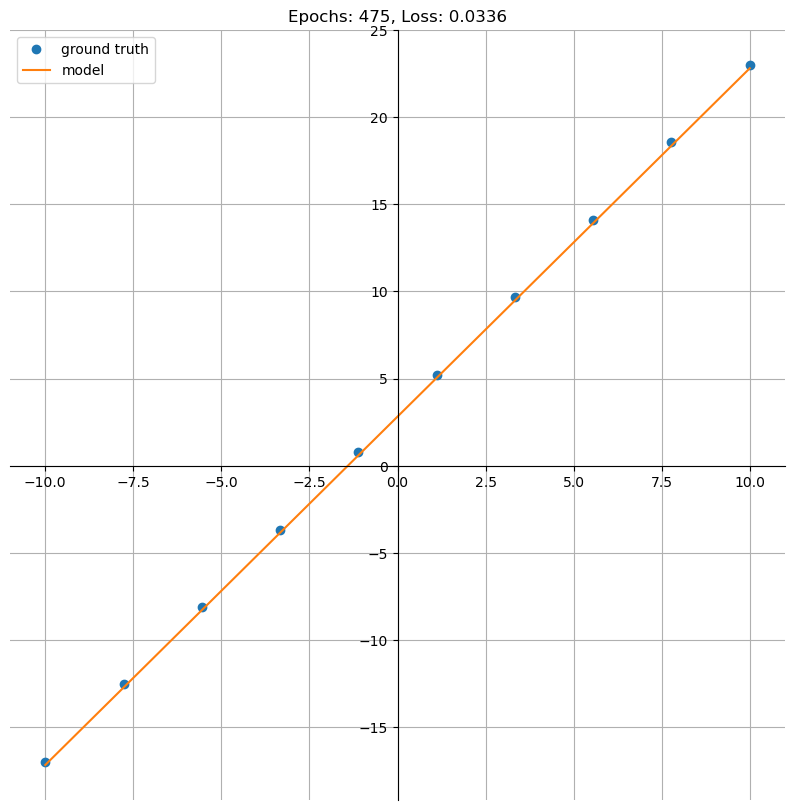

Epoch: 500; Train Loss: 0.030383143573999405


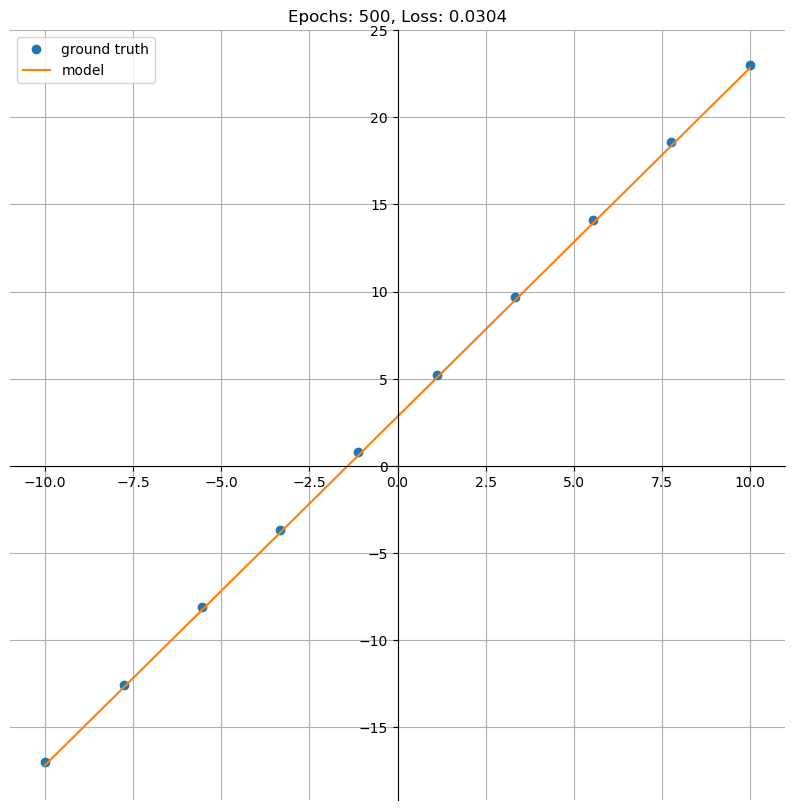

Epoch: 525; Train Loss: 0.027489541098475456


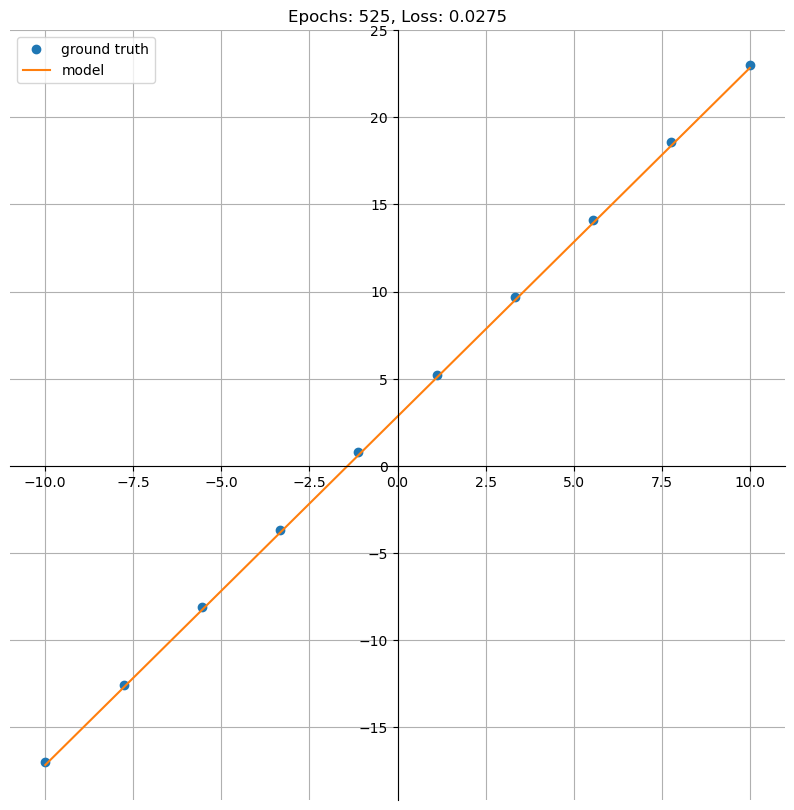

Epoch: 550; Train Loss: 0.024871591478586197


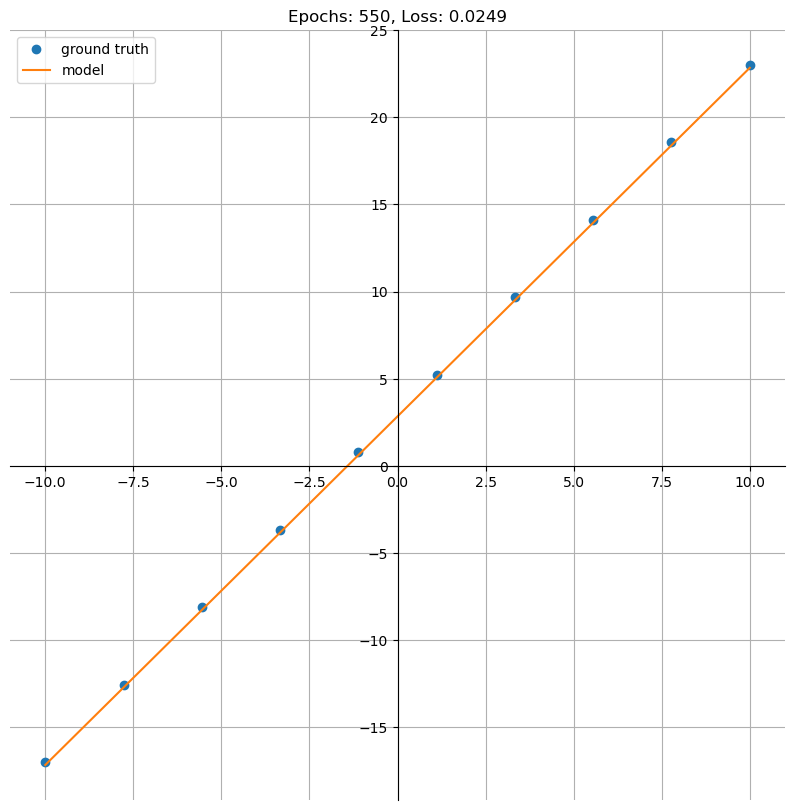

Epoch: 575; Train Loss: 0.022502880543470383


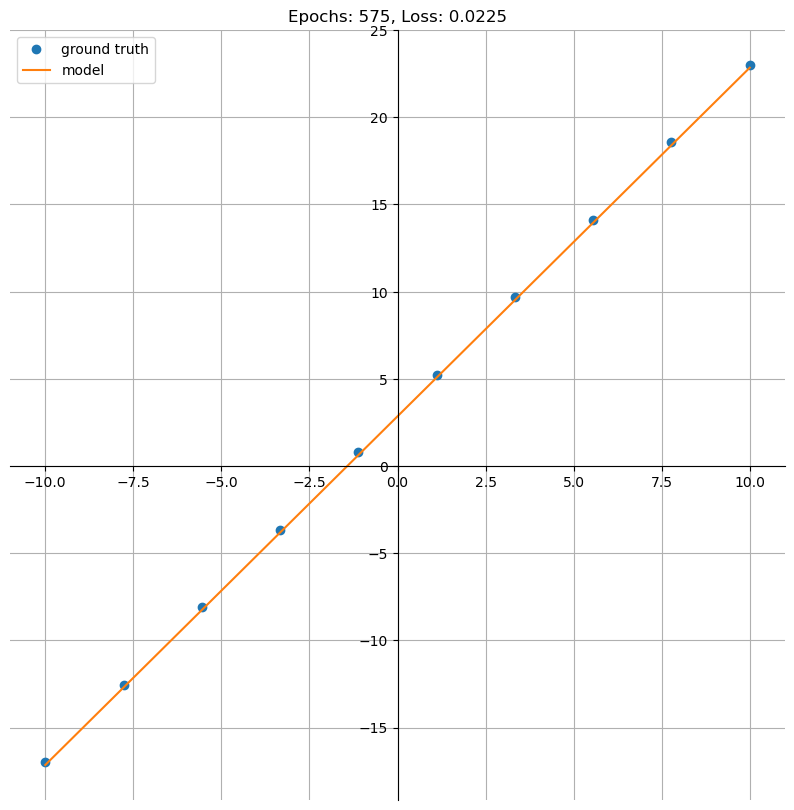

Epoch: 600; Train Loss: 0.020359845831990242


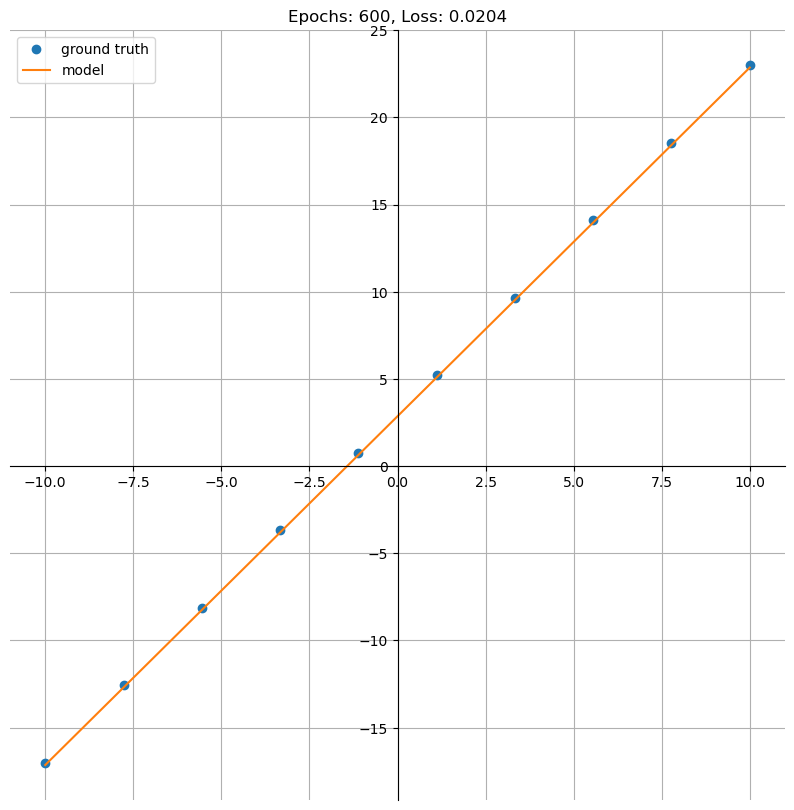

Epoch: 625; Train Loss: 0.018420925363898277


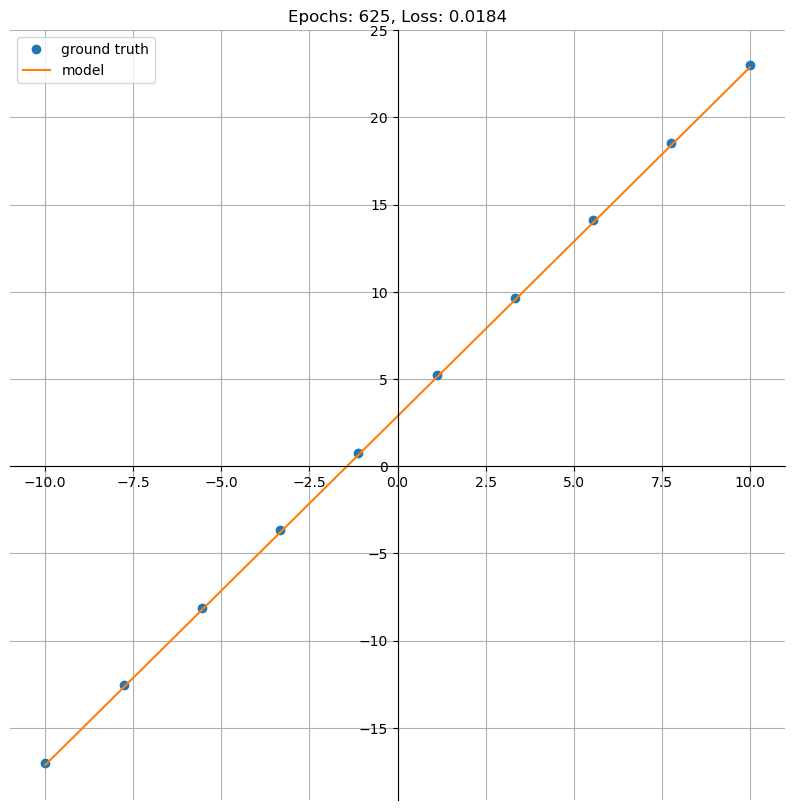

Epoch: 650; Train Loss: 0.016666555777192116


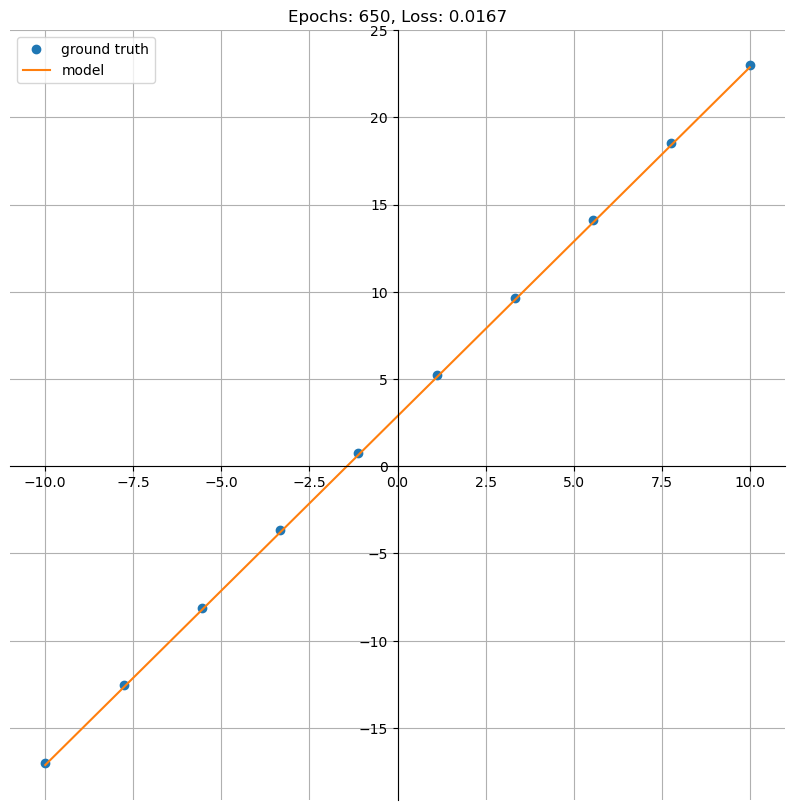

Epoch: 675; Train Loss: 0.015079272910952568


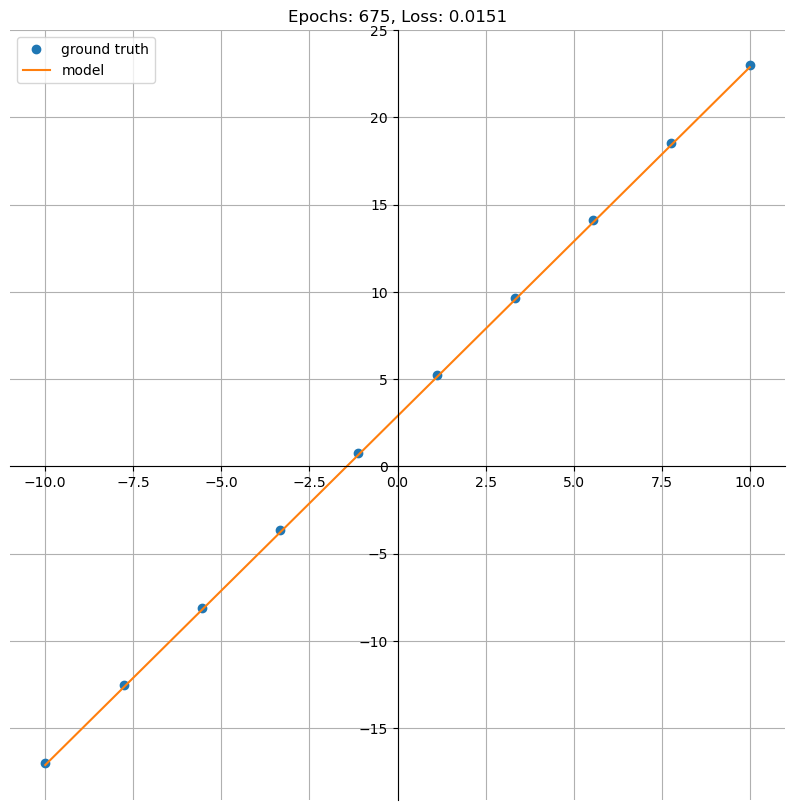

Epoch: 700; Train Loss: 0.013642731122672558


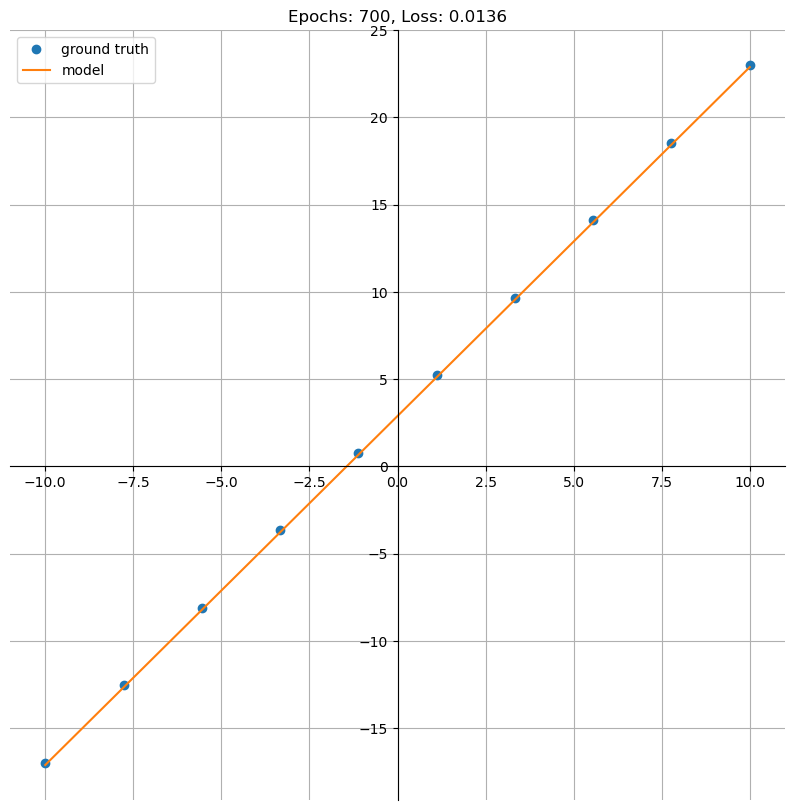

Epoch: 725; Train Loss: 0.01234339363873005


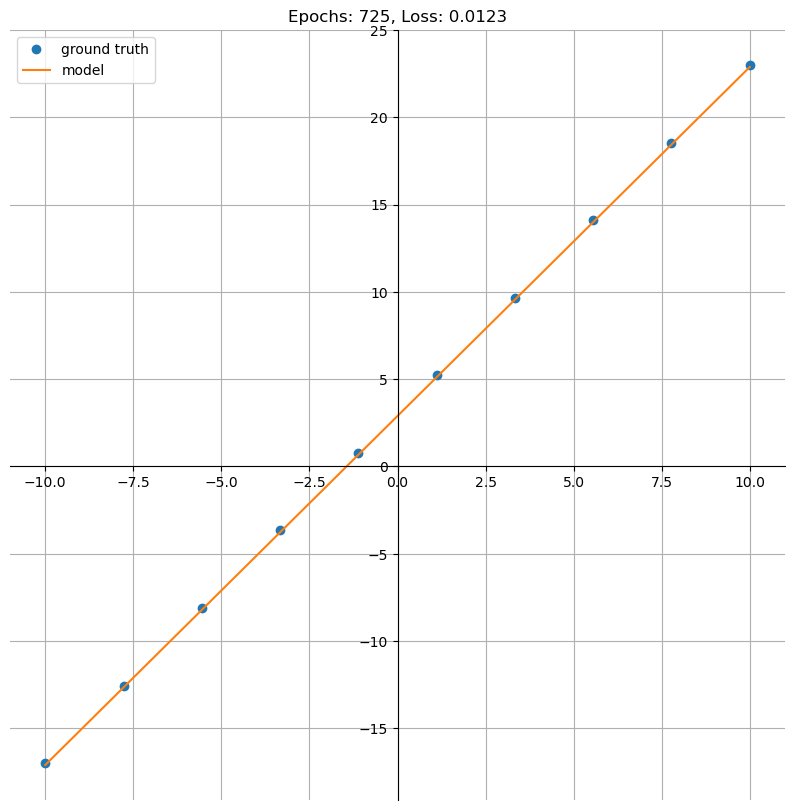

Epoch: 750; Train Loss: 0.011167841032147408


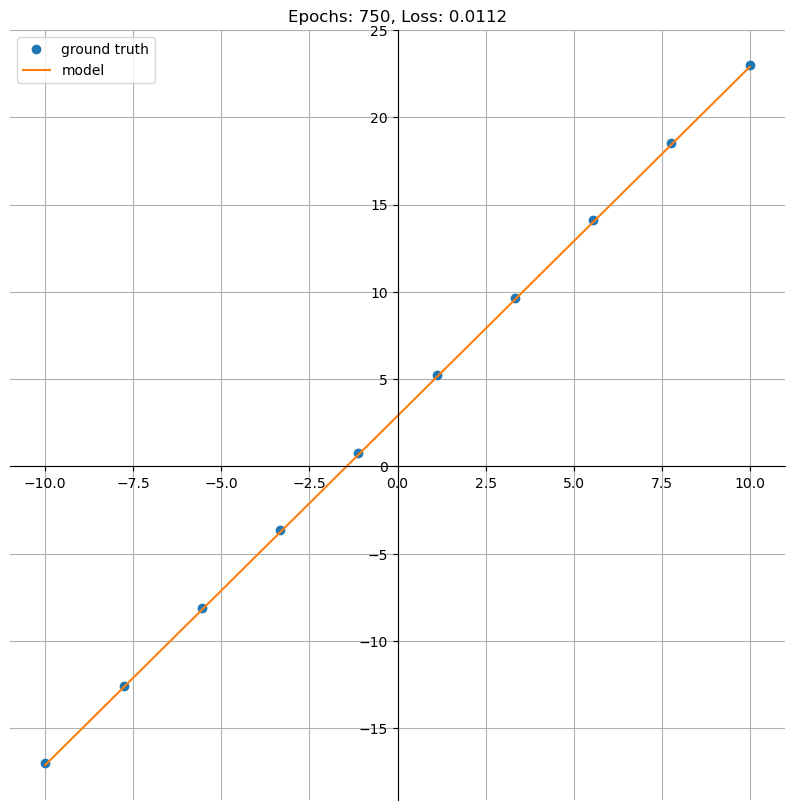

Epoch: 775; Train Loss: 0.010104228742420673


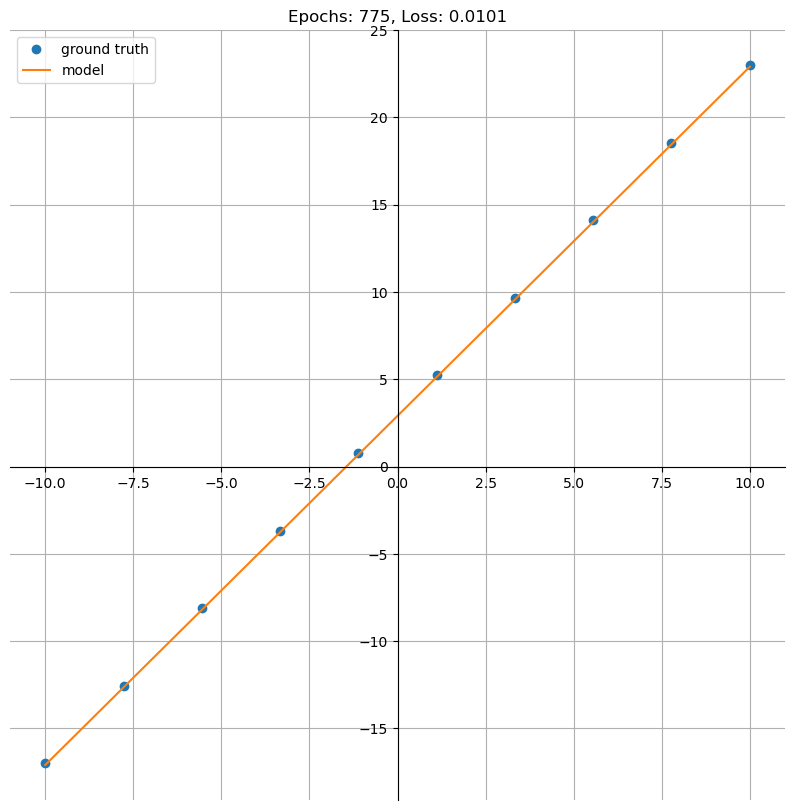

Epoch: 800; Train Loss: 0.009142005816102028


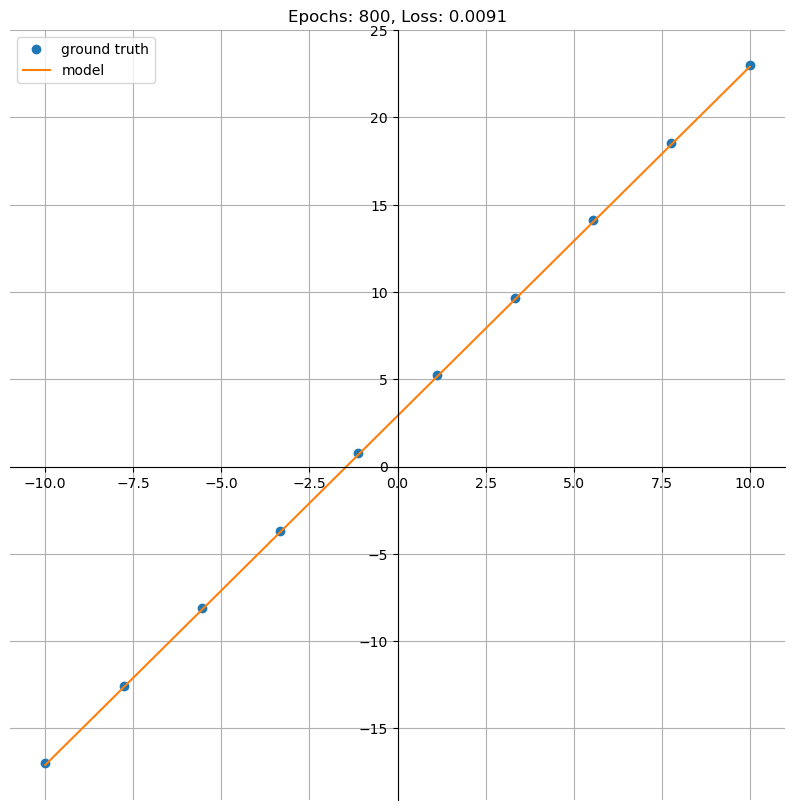

Epoch: 825; Train Loss: 0.008271346800029278


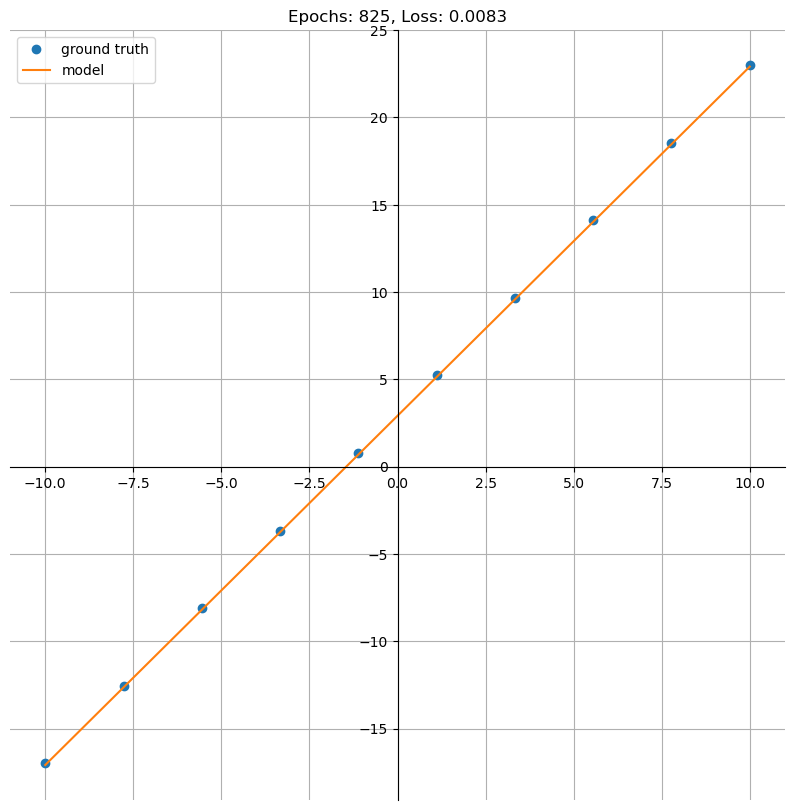

Epoch: 850; Train Loss: 0.007483614608645439


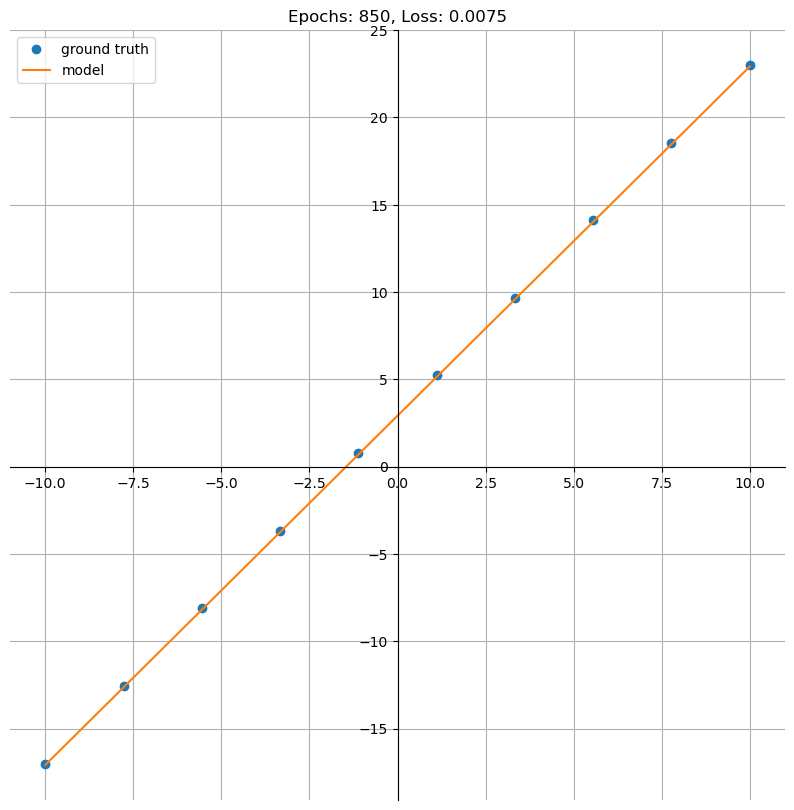

Epoch: 875; Train Loss: 0.006770861800760031


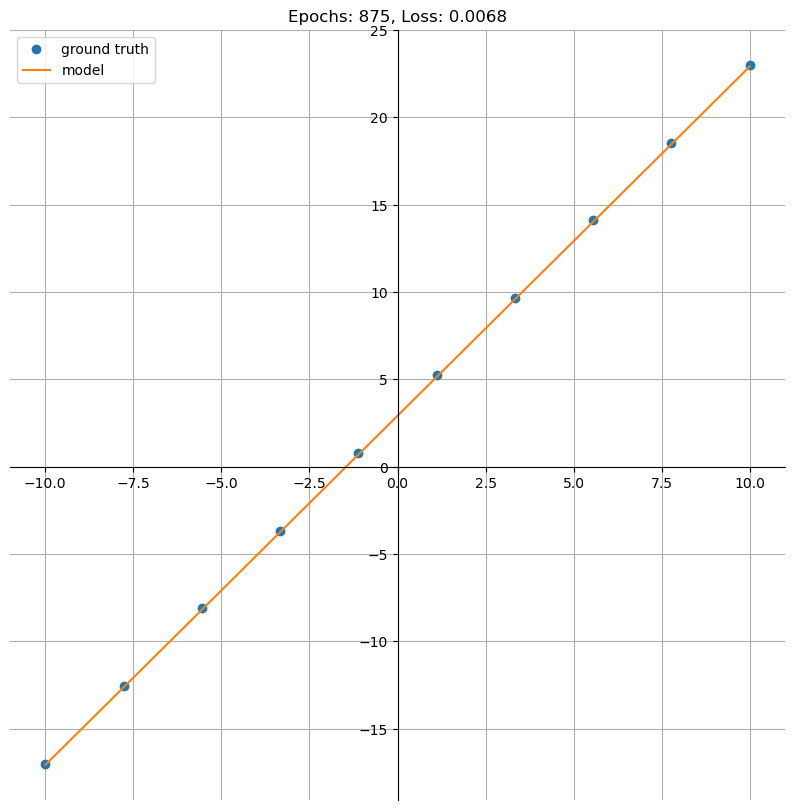

Epoch: 900; Train Loss: 0.006126056890934706


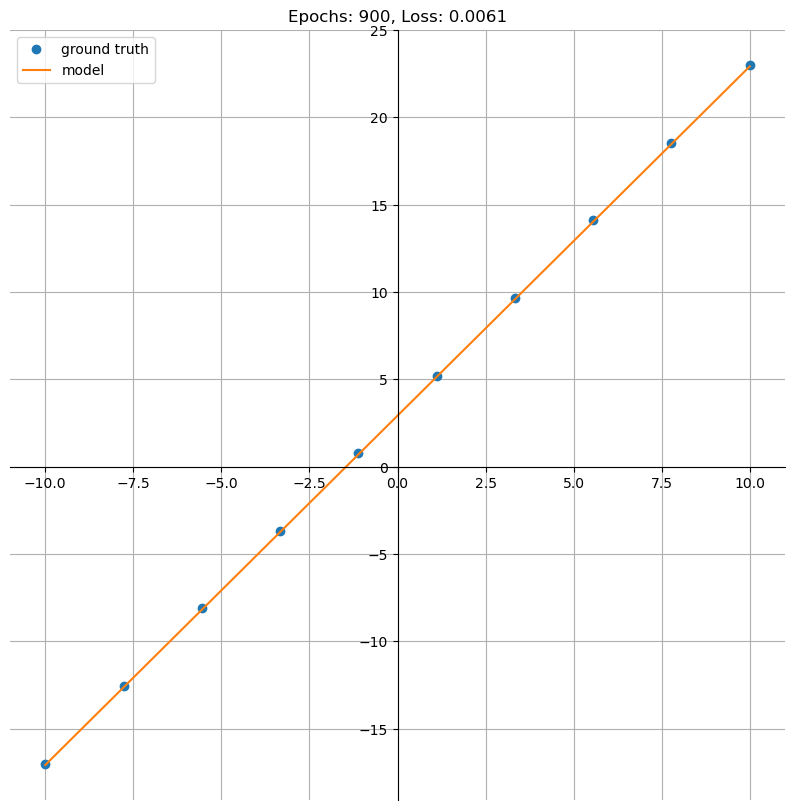

Epoch: 925; Train Loss: 0.005542623344808817


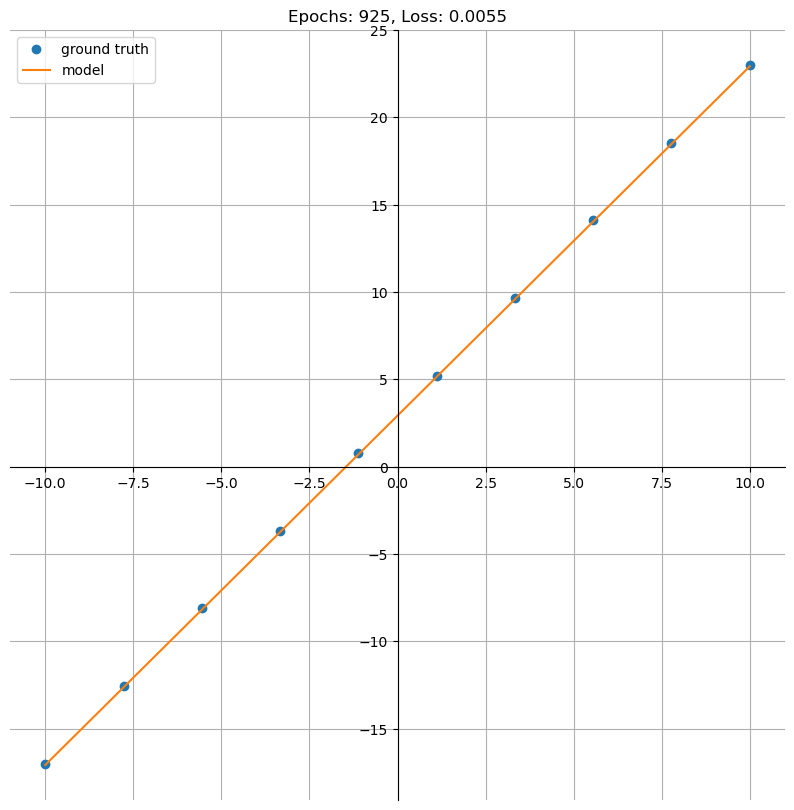

Epoch: 950; Train Loss: 0.005014813505113125


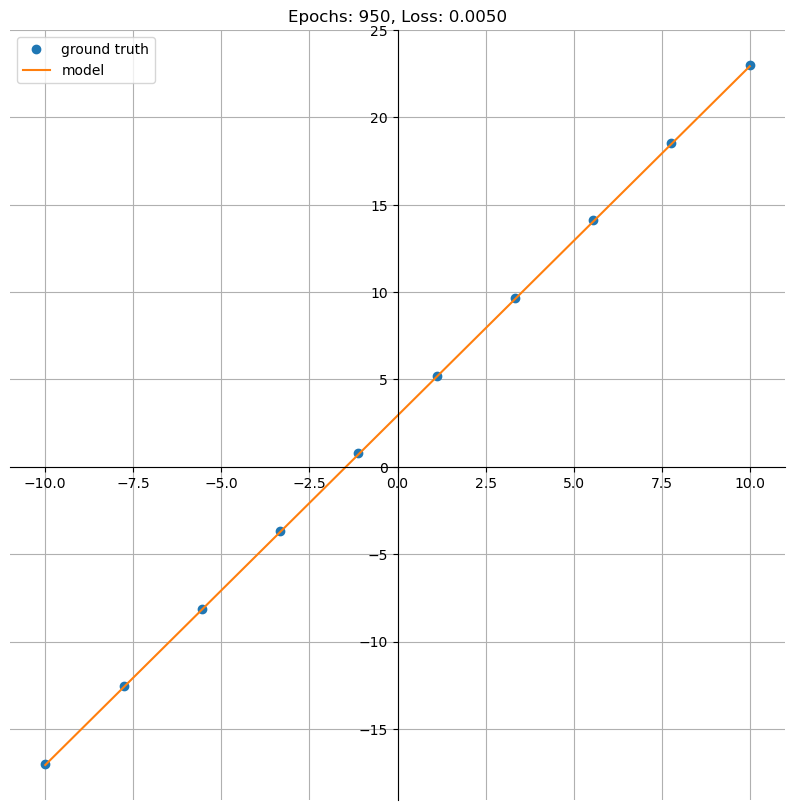

Epoch: 975; Train Loss: 0.004537193104624748


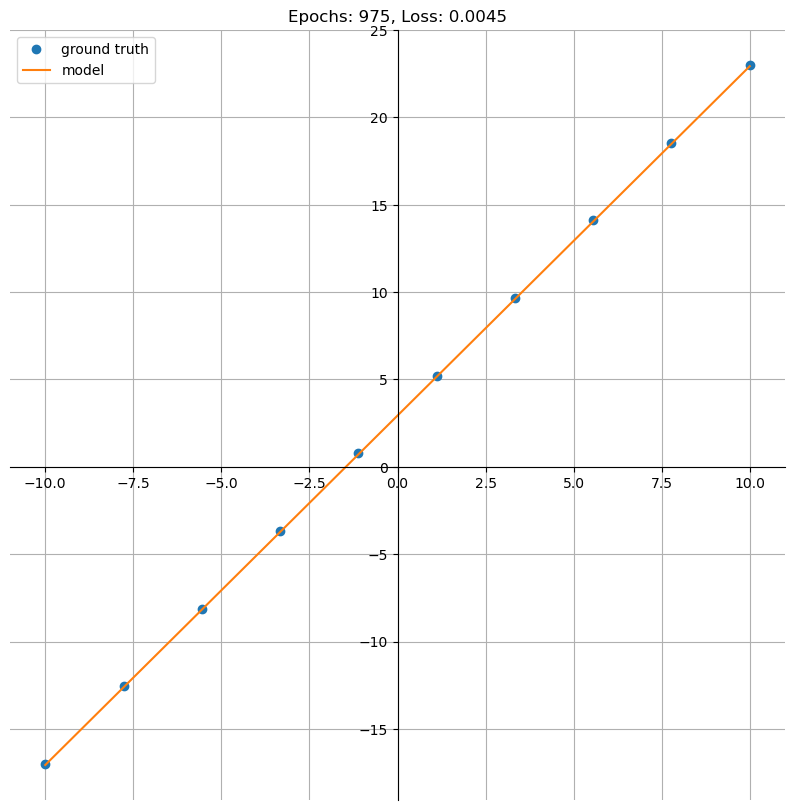

Epoch: 1000; Train Loss: 0.0041050901636481285


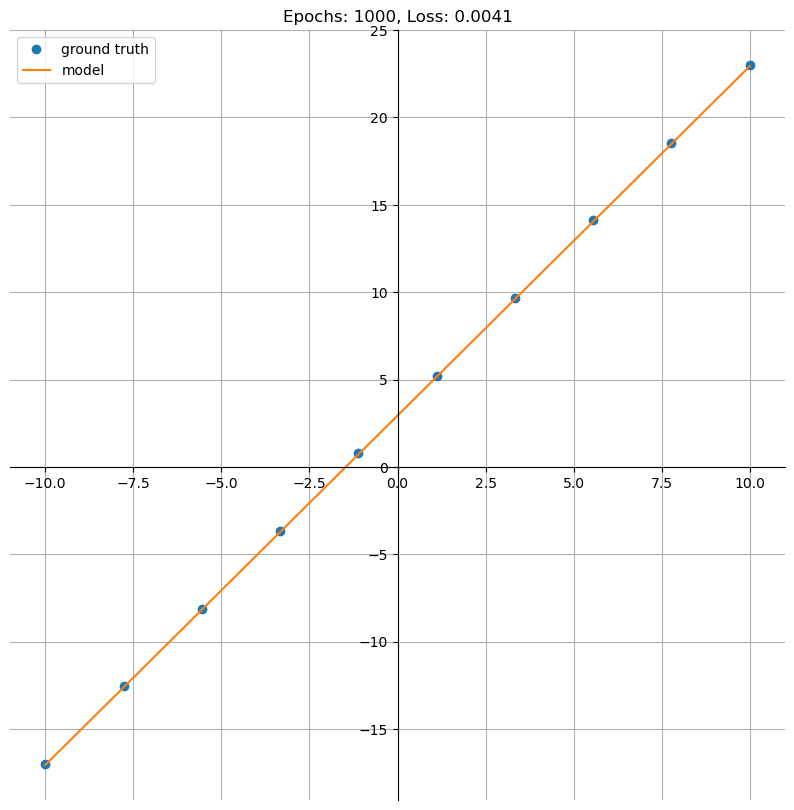

Test Loss: 0.0040979147888720036


In [66]:
epochs = 1001

# Let''s make a Gif of the training
filename_output = "./line_approximation.gif"
writer = imageio.get_writer(filename_output, mode='I', duration=0.3)

model.train()
for t in range(epochs):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t % 25 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    image = plot_comparison(line, model, epoc=t, loss=train_loss)
    # appending to gif
    writer.append_data(image)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")
writer.close()

## **Task 5** (1 pt) **Describe what you observed during the experiments:**

(your observations)...

# 4. Now, it's your turn!

You will find below the definition of a new model, a fully connected network with 5 layers and the Rectified Linear Unit function as activation function. You should use the infrastructure defined in the example to train this model to approximate a more sophisticated function (for example, a parabola).

### **Tasks 6-9** [Optional]: (0.5 pts each)

- 6) Experiment with the network architecture: increase or decrease the number of layers; change the number of neurons in specific layers etc.
- 7) Choose the function you'll use to build your dataset. The simplest way to make it work is to build a new instance of AlgebraicDataset passing a new lambda function and a new (or same) domain. However, feel free to experiment more complex ways of defining a function.
- 8) Experiment different hyperparameters such as number of training epochs, learning rate, or loss function.
- 9) Describe what you learned during the experiments.


In [ ]:
#Define the Model Architecture
class MultiLayerNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 8),
        nn.ReLU(),
        #Write your code here
    )

  def forward(self, x):
    return self.layers(x)

: 

##*Write your solution below this cell*

: 

#**Observations:**
Describe here what you have learned during this assignment...